In [1]:
import pandas as pd


We will evaluate data provided by [Eurostat](https://ec.europa.eu/eurostat/web/energy/data/energy-balances), try to clean it for any further analysis we might consider in the future, visualise some of the data to answer couple of questions:

* Is there any quarterly pattern in goods handled in Baltic States?
* What is y/y change in goods handled in Baltic states?

In [2]:
maritime=pd.read_csv('maritime.csv')

In [3]:
maritime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471 entries, 0 to 1470
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   TIME     1350 non-null   object
 1   REP_MAR  1350 non-null   object
 2   UNIT     1350 non-null   object
 3   Value    1350 non-null   object
dtypes: object(4)
memory usage: 46.1+ KB


In [4]:
maritime.head(10)

,TIME,REP_MAR,UNIT,Value
0,2017Q3,European Union - 27 countries (from 2020),Thousand tonnes,867 048
1,2017Q3,European Union - 27 countries (from 2020),Sum of the last 4 quarters,3 389 247
2,2017Q3,European Union - 27 countries (from 2020),Rolling 4-quarter growth rate,3.00
3,2017Q3,European Union - 27 countries (from 2020),Growth rate on previous period (t/t-1),1.50
4,2017Q3,European Union - 27 countries (from 2020),Growth rate on the same quarter in previous year,4.00
5,2017Q3,Belgium,Thousand tonnes,64 180
6,2017Q3,Belgium,Sum of the last 4 quarters,255 968
7,2017Q3,Belgium,Rolling 4-quarter growth rate,2.00
8,2017Q3,Belgium,Growth rate on previous period (t/t-1),-2.90
9,2017Q3,Belgium,Growth rate on the same quarter in previous year,1.00


Let's get rid off unnecessary rows as we are only interested in Thousand tones units

In [5]:
rows_to_drop = maritime[(maritime['UNIT']=='Sum of the last 4 quarters')
                        |(maritime['UNIT']=='Rolling 4-quarter growth rate')
                        |(maritime['UNIT']=='Growth rate on previous period (t/t-1)')
                        |(maritime['UNIT']=='Growth rate on the same quarter in previous year') ].index
maritime.drop(rows_to_drop, inplace=True)     
maritime.head(10)


,TIME,REP_MAR,UNIT,Value
0,2017Q3,European Union - 27 countries (from 2020),Thousand tonnes,867 048
5,2017Q3,Belgium,Thousand tonnes,64 180
10,2017Q3,Bulgaria,Thousand tonnes,9 097
15,2017Q3,Denmark,Thousand tonnes,20 092
20,2017Q3,Germany,Thousand tonnes,76 029
25,2017Q3,Estonia,Thousand tonnes,7 042
30,2017Q3,Ireland,Thousand tonnes,12 700
35,2017Q3,Greece,Thousand tonnes,40 855
40,2017Q3,Spain,Thousand tonnes,128 699
45,2017Q3,France,Thousand tonnes,74 974


We also dont need total EU as it will be a combination of all the countries in the list

In [6]:
EU_to_drop=maritime[maritime['REP_MAR']=='European Union - 27 countries (from 2020)'].index
maritime.drop(EU_to_drop,inplace=True)
maritime.head(10)

,TIME,REP_MAR,UNIT,Value
5,2017Q3,Belgium,Thousand tonnes,64 180
10,2017Q3,Bulgaria,Thousand tonnes,9 097
15,2017Q3,Denmark,Thousand tonnes,20 092
20,2017Q3,Germany,Thousand tonnes,76 029
25,2017Q3,Estonia,Thousand tonnes,7 042
30,2017Q3,Ireland,Thousand tonnes,12 700
35,2017Q3,Greece,Thousand tonnes,40 855
40,2017Q3,Spain,Thousand tonnes,128 699
45,2017Q3,France,Thousand tonnes,74 974
50,2017Q3,Croatia,Thousand tonnes,5 068


In [7]:
maritime['Value']=maritime['Value'].astype(str)
maritime.isnull().sum()




TIME       121
REP_MAR    121
UNIT       121
Value        0
dtype: int64

In [8]:
maritime=maritime[maritime['TIME'].notna()]
maritime=maritime[maritime['REP_MAR'].notna()]
maritime=maritime[maritime['UNIT'].notna()]
maritime.isnull().sum()
maritime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 5 to 1345
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   TIME     260 non-null    object
 1   REP_MAR  260 non-null    object
 2   UNIT     260 non-null    object
 3   Value    260 non-null    object
dtypes: object(4)
memory usage: 10.2+ KB


In [9]:
maritime.tail()

,TIME,REP_MAR,UNIT,Value
1325,2019Q4,Sweden,Thousand tonnes,40 685
1330,2019Q4,United Kingdom,Thousand tonnes,124 048
1335,2019Q4,Norway,Thousand tonnes,47 654
1340,2019Q4,Montenegro,Thousand tonnes,517.00
1345,2019Q4,Turkey,Thousand tonnes,:


Turkey seems to have bad data, so lets remove those rows as we are not planning to include this country in our analysis

In [10]:
Turkey=maritime[maritime['REP_MAR']=='Turkey'].index
maritime.drop(Turkey,inplace=True)
maritime.tail(10)
maritime['Value']=maritime['Value'].str.replace(' ','')
maritime['Value']=maritime['Value'].str.replace(':','')
maritime['Value']=maritime['Value'].astype(int,errors='ignore')

maritime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 5 to 1340
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   TIME     250 non-null    object
 1   REP_MAR  250 non-null    object
 2   UNIT     250 non-null    object
 3   Value    250 non-null    object
dtypes: object(4)
memory usage: 9.8+ KB


In [11]:
maritime['Year']=maritime['TIME'].str[:4]
maritime['Quarter']=maritime['TIME'].str[4:]
maritime.head()

,TIME,REP_MAR,UNIT,Value,Year,Quarter
5,2017Q3,Belgium,Thousand tonnes,64180,2017,Q3
10,2017Q3,Bulgaria,Thousand tonnes,9097,2017,Q3
15,2017Q3,Denmark,Thousand tonnes,20092,2017,Q3
20,2017Q3,Germany,Thousand tonnes,76029,2017,Q3
25,2017Q3,Estonia,Thousand tonnes,7042,2017,Q3


We have a problem of converting 'Value' column into integer, so let's skip that for now as we will be focusing on individual countries

I am interested in evaluating Baltic countries - Latvia,Lithuania,Estonia so I will create a new dataframe for those

In [12]:
baltic=maritime[(maritime['REP_MAR']=='Latvia') | (maritime['REP_MAR']=='Lithuania') | (maritime['REP_MAR']=='Estonia')].copy()

baltic['Value']=baltic['Value'].astype(int)
baltic.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 25 to 1285
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   TIME     30 non-null     object
 1   REP_MAR  30 non-null     object
 2   UNIT     30 non-null     object
 3   Value    30 non-null     int64 
 4   Year     30 non-null     object
 5   Quarter  30 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.6+ KB


In [13]:
baltic.head()

,TIME,REP_MAR,UNIT,Value,Year,Quarter
25,2017Q3,Estonia,Thousand tonnes,7042,2017,Q3
65,2017Q3,Latvia,Thousand tonnes,12151,2017,Q3
70,2017Q3,Lithuania,Thousand tonnes,13138,2017,Q3
160,2017Q4,Estonia,Thousand tonnes,7983,2017,Q4
200,2017Q4,Latvia,Thousand tonnes,13295,2017,Q4


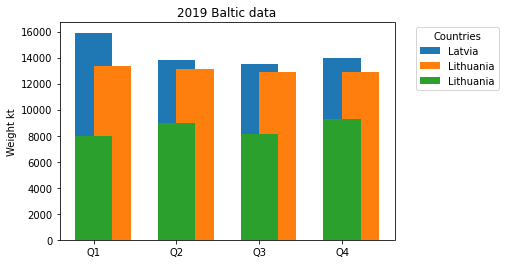

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import arange
%matplotlib inline


labels = ['Q1','Q2','Q3','Q4']

data2019=baltic[baltic['Year']=='2019'].copy()
Latvia=baltic[(baltic['Year']=='2019')&(baltic['REP_MAR']=='Latvia')]
latvia_data=Latvia['Value']
Lithuania=baltic[(baltic['Year']=='2019')&(baltic['REP_MAR']=='Lithuania')]
lithuania_data=Lithuania['Value']
Estonia=baltic[(baltic['Year']=='2019')&(baltic['REP_MAR']=='Estonia')]
estonia_data=Estonia['Value']

bar_positions = arange(4)
x = np.arange(len(labels))  # the label locations
width = 0.45


fig, ax = plt.subplots()
rects1 = ax.bar(bar_positions,latvia_data, width, label='Latvia',align='center')
rects2 = ax.bar(bar_positions, lithuania_data, width, label='Lithuania',align='edge')
rects3 = ax.bar(bar_positions, estonia_data, width, label='Lithuania',align='center')

ax.set_ylabel('Weight kt')
ax.set_title('2019 Baltic data')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(handles=[rects1,rects2,rects3], title='Countries',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Latvia is reducing its gross tonnage after Q1, for other countries i dont see any particular pattern

Lets check changes by quarter between 2018 and 2019 for the Baltic states


In [15]:
data2018=baltic[baltic['Year']=='2018'].copy()
data2018.info()
data2018.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 295 to 745
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   TIME     12 non-null     object
 1   REP_MAR  12 non-null     object
 2   UNIT     12 non-null     object
 3   Value    12 non-null     int64 
 4   Year     12 non-null     object
 5   Quarter  12 non-null     object
dtypes: int64(1), object(5)
memory usage: 672.0+ bytes


,TIME,REP_MAR,UNIT,Value,Year,Quarter
295,2018Q1,Estonia,Thousand tonnes,7752,2018,Q1
335,2018Q1,Latvia,Thousand tonnes,13984,2018,Q1
340,2018Q1,Lithuania,Thousand tonnes,12567,2018,Q1
430,2018Q2,Estonia,Thousand tonnes,8287,2018,Q2
470,2018Q2,Latvia,Thousand tonnes,15704,2018,Q2


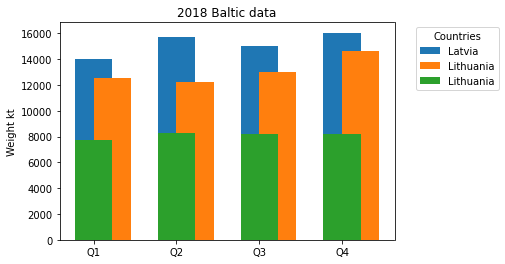

In [16]:
%matplotlib inline


labels = ['Q1','Q2','Q3','Q4']

Latvia18=baltic[(baltic['Year']=='2018')&(baltic['REP_MAR']=='Latvia')]
latvia_data_18=Latvia18['Value']
Lithuania18=baltic[(baltic['Year']=='2018')&(baltic['REP_MAR']=='Lithuania')]
lithuania_data_18=Lithuania18['Value']
Estonia18=baltic[(baltic['Year']=='2018')&(baltic['REP_MAR']=='Estonia')]
estonia_data_18=Estonia18['Value']

bar_positions = arange(4)
x = np.arange(len(labels))  # the label locations
width = 0.45


fig, ax = plt.subplots()
rects1 = ax.bar(bar_positions,latvia_data_18, width, label='Latvia',align='center')
rects2 = ax.bar(bar_positions, lithuania_data_18, width, label='Lithuania',align='edge')
rects3 = ax.bar(bar_positions, estonia_data_18, width, label='Lithuania',align='center')

ax.set_ylabel('Weight kt')
ax.set_title('2018 Baltic data')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(handles=[rects1,rects2,rects3], title='Countries',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

No particular pattern for Estonia again, Lithuania is showing increase throughout the year.

Lets look at yearly averages per country over the 2018-2019 period

In [17]:
es_2018_mean=estonia_data_18.mean()
es_2019_mean=estonia_data.mean()
lt_2018_mean=lithuania_data_18.mean()
lt_2019_mean=lithuania_data.mean()
lv_2018_mean=latvia_data_18.mean()
lv_2019_mean=latvia_data.mean()

mean_table=pd.DataFrame()
mean_table['2018']=[es_2018_mean,lt_2018_mean,lv_2018_mean]
mean_table['2019']=[es_2019_mean,lt_2019_mean,lv_2019_mean]

mean_table.index = ['Estonia', 'Lithuania', 'Latvia']

mean_table


,2018,2019
Estonia,8108.50,8592.75
Lithuania,13115.75,13061.00
Latvia,15201.00,14311.75


Text(0, 0.5, 'Weight(kt)')

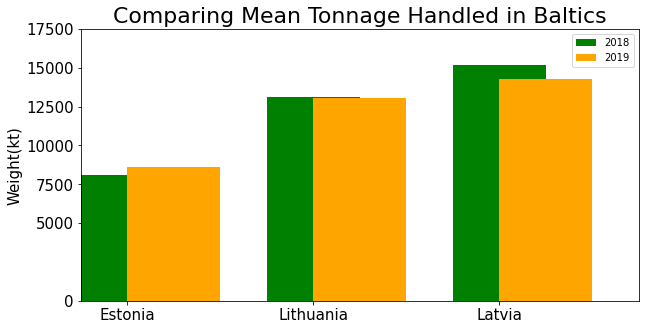

In [18]:
labels_1=['Estonia', 'Lithuania', 'Latvia']

mean_table['2018'].plot.bar(legend=True,color='green',figsize=(10,5),align='center',rot='0',fontsize='15',
                         yticks=[0, 5000, 7500, 10000, 12500, 15000,17500],ylim=[0,17500],)
mean_table['2019'].plot.bar(legend=True,color='orange',figsize=(10,5),align='edge',rot='0',fontsize='15')
plt.title('Comparing Mean Tonnage Handled in Baltics',fontsize='22')
plt.ylabel('Weight(kt)',fontsize='15')


We can see that average weight of goods handled in Latvia slightly declined Y/Y, Lithuania remained constant and Estonia increased